In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k 
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Salary_dataset.csv')
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
data.shape

(30, 3)

In [4]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [6]:
data.isnull().mean()

YearsExperience    0.0
Salary             0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

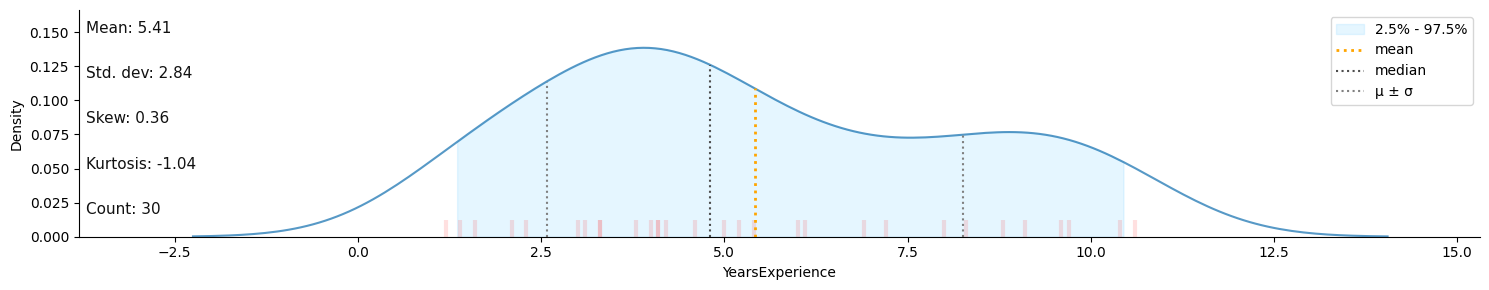

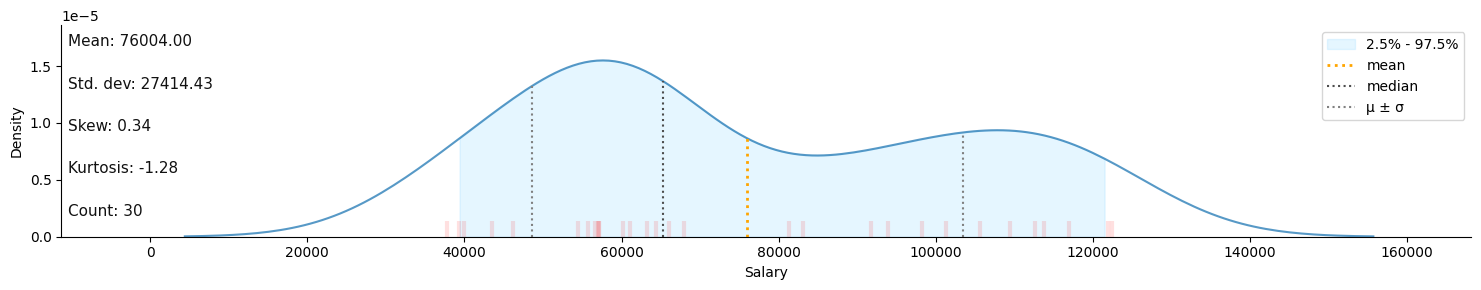

In [8]:
k.dist_plot(data=data);

In [9]:
data.corr()['Salary']


YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

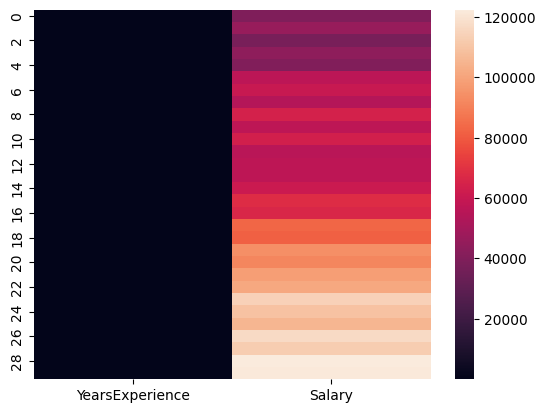

In [10]:
sns.heatmap(data=data, annot=False)
plt.show()

In [11]:
x=data[['YearsExperience']].values
y = data[['Salary']].values

In [12]:
sc= StandardScaler()

In [13]:
x=sc.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2, random_state=10)

In [15]:
model=LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
Training_score=model.score(x_train,y_train)*100
Training_score

94.94673013344645

In [18]:
Testing_score=model.score(x_test,y_test)*100
Testing_score

98.16423482070252

In [19]:
y_pred=model.predict(x_test)
y_pred

array([[89716.76498848],
       [56032.05821174],
       [53224.99931368],
       [40125.39112273],
       [44803.8226195 ],
       [92523.82388655]])

In [20]:
R2_score=r2_score(y_test,y_pred)*100
R2_score

98.16423482070252

In [21]:
mea= mean_absolute_error(y_test,y_pred)
mea

2741.2806275420867

In [22]:
mse=mean_squared_error(y_test,y_pred)
mse

9785570.13891436

In [23]:
rmse=np.sqrt(mse)
rmse

3128.189594464242

In [24]:
PREDICTION= pd.DataFrame(zip(y_test, y_pred),columns=('ACTUAL','PREDICTED'))
PREDICTION

,ACTUAL,PREDICTED
0,[91739.0],[89716.76498848434]
1,[54446.0],[56032.05821174267]
2,[56643.0],[53224.999313680855]
3,[37732.0],[40125.39112272576]
4,[43526.0],[44803.82261949543]
5,[98274.0],[92523.82388654615]
